In [29]:
import os
from sklearn import datasets
import numpy as np
import pandas as pd 

df = pd.read_csv('C:/Users/moret/Downloads/_documents/GitHub/projetPython/ProjectApp/datasets/iris_data.csv')

In [30]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
#subdivision
from sklearn.model_selection import train_test_split
dftrain, dftest= train_test_split(df,test_size = 0.7,random_state=69780)
#vérifications
print(dftrain.shape) #(200, 17)
print(dftest.shape) #(137, 17)


(45, 5)
(105, 5)


In [37]:
print(dftrain)

     sepal_length  sepal_width  petal_length  petal_width     species
16            5.4          3.9           1.3          0.4      setosa
120           6.9          3.2           5.7          2.3   virginica
115           6.4          3.2           5.3          2.3   virginica
62            6.0          2.2           4.0          1.0  versicolor
15            5.7          4.4           1.5          0.4      setosa
81            5.5          2.4           3.7          1.0  versicolor
45            4.8          3.0           1.4          0.3      setosa
89            5.5          2.5           4.0          1.3  versicolor
73            6.1          2.8           4.7          1.2  versicolor
46            5.1          3.8           1.6          0.2      setosa
60            5.0          2.0           3.5          1.0  versicolor
34            4.9          3.1           1.5          0.1      setosa
9             4.9          3.1           1.5          0.1      setosa
31            5.4   

In [38]:
#matrice des explicatives
XTrain = dftrain.iloc[:,:3]
print(XTrain.shape)
#à laquelle est ajoutée (accolée) la constante 1
import statsmodels.api as sm
X1Train = sm.add_constant(XTrain)

(45, 3)


In [40]:
#vecteur cible
yTrain = dftrain.iloc[:,3]
#lancer la régression
reg = sm.OLS(yTrain,X1Train)
resReg = reg.fit()


In [41]:
#affichage
print(resReg.summary())


                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.40e-25
Time:                        14:03:14   Log-Likelihood:                 11.919
No. Observations:                  45   AIC:                            -15.84
Df Residuals:                      41   BIC:                            -8.610
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4644      0.324     -1.435   

In [42]:
###PREDICTION
#appliquer le modèle
XTest = dftest.iloc[:,:3]
X1Test = sm.add_constant(XTest)
ypReg = reg.predict(resReg.params,X1Test)
print(ypReg)


[1.57215598 1.72424588 2.27730593 0.23967388 1.76414371 0.17744267
 2.0506482  0.34505611 1.55530156 1.7517625  0.42148    1.41607346
 1.79280635 0.39405581 1.63910828 1.34407495 0.26881709 2.26111694
 2.10203235 1.98160715 1.56853308 1.36707376 1.12170556 1.17760752
 1.27693779 0.29539098 1.89713499 0.15577473 1.37264515 1.46278112
 2.12764509 2.13569336 2.07288914 0.98804885 2.31548474 1.66777092
 1.60487427 2.37147912 0.35262381 0.54142462 1.38750326 1.59701085
 1.66595946 1.39497853 0.19729916 0.01615848 1.9618431  1.78581166
 1.32316487 0.26748622 1.19122718 1.52115997 0.26805922 2.19735157
 0.09420896 1.79271392 1.7803327  1.95322181 1.70333581 1.99655769
 0.13997389 2.35058748 1.98727097 1.19879488 0.17005983 0.3377657
 1.3856918  0.32396118 0.32471905 0.28110588 0.26067638 1.21855894
 0.96195553 0.23267919 1.60620514 0.23267919 1.11471087 1.8548527
 1.96117766 0.08549524 1.21922438 0.12644666 2.06312184 0.19787216
 0.22029797 1.28941144 0.27496148 1.51130024 2.06378728 1.801427

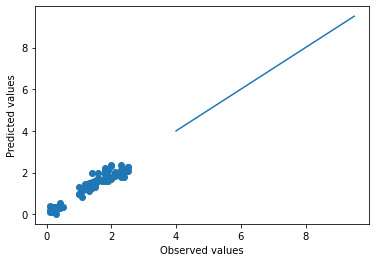

In [43]:
#y obs. sur l'échantillon test
yTest = dftest.iloc[:,3]
#librairie numpy
import numpy
#graphique
import matplotlib.pyplot as plt
plt.scatter(yTest,ypReg)
plt.plot(numpy.arange(4,10,0.5),numpy.arange(4,10,0.5))
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.show()

In [66]:
#mesurer le MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yTest,ypReg)) #0.3352130958741573


0.03582520288029483


In [71]:
#moyennes des variables
print(sc.mean_)


[5.78190476 3.04380952 3.59714286 1.12190476]


In [72]:
#variance des variables
print(sc.var_)


[0.69386304 0.20093787 3.16675374 0.55923447]


In [73]:
#affichage des moyennes après transformations
print(numpy.mean(ZTrain,axis=0))

[-4.96956973e-16 -8.33195946e-16  9.72766841e-17 -5.70971841e-17]


In [74]:
#affichage des variances itou
print(numpy.var(ZTrain,axis=0))

[1. 1. 1. 1.]


In [ ]:
#OLS.fit_regularized(method='elastic_net', alpha=0.0, L1_wt=1.0, start_params=None, profile_scale=False, refit=False, **kwargs)

In [308]:
#centrer et réduire les données d'apprentissage
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ZTrain =sc.fit_transform(dftrain.iloc[:,:4])

In [317]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Test =sc.fit_transform(pd.DataFrame(yTrain))

In [309]:
dftrain.iloc[:,:4]

,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
134,6.1,2.6,5.6,1.4
110,6.5,3.2,5.1,2.0
68,6.2,2.2,4.5,1.5
27,5.2,3.5,1.5,0.2
...,...,...,...,...
49,5.0,3.3,1.4,0.2
142,5.8,2.7,5.1,1.9
33,5.5,4.2,1.4,0.2
133,6.3,2.8,5.1,1.5


In [316]:
pd.DataFrame(yTrain)

,petal_width
41,0.3
134,1.4
110,2.0
68,1.5
27,0.2
...,...
49,0.2
142,1.9
33,0.2
133,1.5


In [75]:
#régression Lasso, paramètres par défaut (alpha = 1.0)
from sklearn.linear_model import Lasso
regLasso1 = Lasso(fit_intercept=False,normalize=False)
print(regLasso1)

Lasso(fit_intercept=False)


In [179]:
reg = sm.OLS(ZTrain[:,3],ZTrain[:,:3])
#resReg = reg.fit_regularized(method='elastic_net', alpha=0.0, L1_wt=1)
resReg


In [184]:
ols_mod = sm.OLS(ZTrain[:,3],ZTrain[:,:3])
fitOLS = ols_mod.fit_regularized(alpha=0.1)

In [187]:
dir(fitOLS)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 'fittedvalues',
 'initialize',
 'k_constant',
 'model',
 'params',
 'predict',
 'summary']

In [206]:
#coef
fitOLS.params

array([0.        , 0.        , 0.86289565])

In [45]:
import statsmodels.api as sm
model = sm.OLS(yTrain,X1Train)
results_fu = model.fit()
print(results_fu.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.40e-25
Time:                        14:03:36   Log-Likelihood:                 11.919
No. Observations:                  45   AIC:                            -15.84
Df Residuals:                      41   BIC:                            -8.610
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4644      0.324     -1.435   

In [46]:
frames = []
test=0.25
for n in np.arange(0, test, 0.05).tolist():
    results_fr = model.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    frames.append(np.append(results_fr.params, results_fr_fit.ssr))

df6 = pd.DataFrame(frames, columns=list(X1Train.columns) + ['ssr*'])
df6.index=np.arange(0, 0.25, 0.05).tolist()
df6.index.name = 'alpha*'
df6.T

alpha*,0.00,0.05,0.10,0.15,0.20
const,-0.464393,-0.111330,-0.074590,-0.058521,-0.049136
sepal_length,-0.142851,-0.090807,-0.048792,-0.025414,-0.010347
sepal_width,0.210949,0.058229,0.003656,-0.022800,-0.037562
petal_length,0.490921,0.442785,0.412786,0.393952,0.380125
ssr*,1.551267,1.718305,1.851308,1.953623,2.042281


In [61]:
df7.values

array([[-0.46439307, -0.1113297 , -0.07458967, -0.05852078, -0.04913633],
       [-0.14285101, -0.09080658, -0.04879248, -0.02541397, -0.0103471 ],
       [ 0.21094933,  0.05822867,  0.00365624, -0.02279951, -0.03756215],
       [ 0.49092126,  0.44278492,  0.41278608,  0.39395225,  0.38012469],
       [ 1.55126726,  1.71830543,  1.85130785,  1.95362333,  2.04228126]])

In [64]:
df7.drop(index="ssr*")

alpha*,0.00,0.05,0.10,0.15,0.20
const,-0.464393,-0.111330,-0.074590,-0.058521,-0.049136
sepal_length,-0.142851,-0.090807,-0.048792,-0.025414,-0.010347
sepal_width,0.210949,0.058229,0.003656,-0.022800,-0.037562
petal_length,0.490921,0.442785,0.412786,0.393952,0.380125


In [73]:
np.arange(0, len(df7.index),1)

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [234]:
len(np.array(np.array_split(np.array(np.array_split(df7.values, 5)).ravel(), 5)).tolist())

5

In [111]:
import time
start_time = time.time()
np.array_split(df7.values, 5)[1]
'Le temps de calcul est de '+str("%s secondes" % (time.time() - start_time))+' pour cette analyse'

'Le temps de calcul est de 0.0 secondes pour cette analyse'

In [256]:
np.mean(np.arange(0,len(list(df7.columns)),1))

2.0

In [293]:
for i in len(df7.T.columns):
    print(df7.T.columns[i])

TypeError: 'int' object is not iterable

In [306]:
list(df7.T.columns)*2

['const',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'ssr*',
 'const',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'ssr*']

In [312]:
np.arange(0,len(df7.T.columns),1)

array([0, 1, 2, 3, 4])

In [289]:
np.linspace(0, 10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [323]:
import numpy as np
from bokeh.plotting import figure, output_file, show

# select a palette
from bokeh.palettes import Dark2_5 as palette
# itertools handles the cycling
import itertools  

output_file('bokeh_cycle_colors.html')

p = figure(width=400, height=400)
x = np.linspace(0, 10)

# create a color iterator
colors = itertools.cycle(palette)    
leg=list(df7.T.columns)*2
for m, color,leg in zip(range(10), colors,leg):
    y = m * x
    p.line(x, y, legend=str(leg).format(m), color=color)

p.legend.location='top_left'
show(p)

In [325]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X, y)
ElasticNetCV(cv=5, random_state=0)
print(regr.alpha_)
print(regr.intercept_)
print(regr.predict([[0, 0]]))

0.1994727942696716
0.3988829654276791
[0.39888297]


In [280]:
from bokeh.models import Legend, LegendItem
from bokeh.plotting import figure, show
from bokeh.plotting import figure, output_file, show  
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis 

p = figure()
p.legend.location = "top_left"
r = p.multi_line([[1,2,3], [1,2,3]], [[1,3,2], [3,4,3]],
                 color=Viridis[4], line_width=4, legend_label='name', 'a'
                 )


show(p)

In [283]:
colors_list = ['blue', 'yellow']
legends_list = ['first', 'second']
xs=[[4, 2, 5], [1, 3, 4]]
ys=[[6, 5, 2], [6, 5, 7]]
p = figure(plot_width=300, plot_height=300)
for (colr, leg, x, y ) in zip(colors_list, legends_list, xs, ys):
    my_plot = p.line(x, y, color= colr, legend= leg)

In [282]:
import pandas as pd

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL, GOOG, IBM, MSFT

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)

RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()

In [284]:
import numpy as np
from bokeh.plotting import figure, output_file, show

# select a palette
from bokeh.palettes import Dark2_5 as palette
# itertools handles the cycling
import itertools  

output_file('bokeh_cycle_colors.html')

p = figure(width=400, height=400)
x = np.linspace(0, 10)

# create a color iterator
colors = itertools.cycle(palette)    

for m, color in zip(range(10), colors):
    y = m * x
    p.line(x, y, legend='m = {}'.format(m), color=color)

p.legend.location='top_left'
show(p)

In [267]:
# importing the modules  
from bokeh.plotting import figure, output_file, show  
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis 
  
# file to save the model  
output_file("gfg.html")  
         
# instantiating the figure object  
graph = figure(title = "Bokeh Palettes")  
  
# demonstrating the Magma palette 
graph.vbar(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  
           top = [9] * 11, 
           bottom = [8] * 11, 
           width = 1, 
           color = Magma[11]) 
  
# demonstrating the Inferno palette 
graph.vbar(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  
           top = [7] * 11, 
           bottom = [6] * 11, 
           width = 1, 
           color = Inferno[11]) 
  
# demonstrating the Plasma palette 
graph.vbar(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  
           top = [5] * 11, 
           bottom = [4] * 11, 
           width = 1, 
           color = Plasma[11]) 
  
# demonstrating the Viridis palette 
graph.vbar(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  
           top = [3] * 11, 
           bottom = [2] * 11, 
           width = 1, 
           color = Viridis[11]) 
  
# demonstrating the Cividis palette 
graph.vbar(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  
           top = [1] * 11, 
           width = 1, 
           color = Cividis[11]) 
     
# displaying the model  
show(graph)

In [209]:
[dict(x=[1,5,87,4,50], y=np.array_split(df7.values, 5))['y'][i] for i in np.arange(0,len(list(df7.columns))-2,1)

SyntaxError: unexpected EOF while parsing (<ipython-input-209-24b68b8169b6>, line 1)

In [252]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show
import itertools
from bokeh.palettes import Dark2_5 as palette
# instantiating the figure object  
graph = figure(title = "Bokeh Multi Line Graph")  
     
# the points to be plotted  
xs = np.array(np.array_split(np.array(np.array_split(df7.values, 5)).ravel(), 5)).tolist()  
ys = [[5, 3, 8, 0], [5, -4, 10, -2, 5],[5, 3, 8, 0], [5, -4, 10, -2, 5],[5, 3, 8, 0]]  
    
# plotting the graph  
graph.multi_line(xs, ys, color = itertools.cycle(palette))  
show(graph)    

ValueError: expected an element of ColumnData(String, Seq(Any)), got {'xs': [[-0.46439307209178027, -0.11132970178329206, -0.07458967196612536, -0.058520777220804135, -0.04913633297733588], [-0.14285100896162015, -0.0908065776988838, -0.04879247913785975, -0.025413973163666385, -0.010347097366128514], [0.21094932522568532, 0.05822867137695873, 0.0036562430509614378, -0.022799505782270895, -0.037562154540766605], [0.49092126368170363, 0.4427849168225111, 0.41278607989367505, 0.3939522523336388, 0.38012468941122707], [1.5512672637092368, 1.718305431138058, 1.8513078539027155, 1.9536233320941983, 2.0422812631874234]], 'ys': [[5, 3, 8, 0], [5, -4, 10, -2, 5], [5, 3, 8, 0], [5, -4, 10, -2, 5], [5, 3, 8, 0]], 'line_color': <itertools.cycle object at 0x000002C4FF0D8500>}

In [313]:


np.array(np.array_split(
    np.array(np.array_split([[1, 2, 3, 4, 5], [-4, -2, 0, 2, 4]] , 2)).ravel(), 2)).tolist()

[[1, 2, 3, 4, 5], [-4, -2, 0, 2, 4]]

In [320]:
for m in range(2):
    print(dict(x=np.array(
            np.array_split(
                np.array(
                    np.array_split(
                        np.array(list(np.arange(0, 0.25,0.05))*5),
                    5)
                ).ravel(),
            5)
        ).tolist(), 
        y = np.array(
            np.array_split(
                np.array(
                    np.array_split(
                        np.array(list(np.arange(0, 0.25,0.05))*4),
                    4)
                ).ravel(),
            4)
        ).tolist())['x'][m])
     

[0.0, 0.05, 0.1, 0.15000000000000002, 0.2]
[0.0, 0.05, 0.1, 0.15000000000000002, 0.2]


In [321]:
dict(x=np.array(
            np.array_split(
                np.array(
                    np.array_split(
                        np.array(list(np.arange(0, 0.25,0.05))*5),
                    5)
                ).ravel(),
            5)
        ).tolist(), 
        y = np.array(
            np.array_split(
                np.array(
                    np.array_split(
                        np.array(list(np.arange(0, 0.25,0.05))*4),
                    4)
                ).ravel(),
            4)
        ).tolist()).data

AttributeError: 'dict' object has no attribute 'data'

In [245]:
np.array(list(np.arange(0, 0.25,0.05))*3)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.  , 0.05, 0.1 , 0.15, 0.2 , 0.  ,
       0.05, 0.1 , 0.15, 0.2 ])

In [229]:
[[1, 2, 3, 4, 5], [-4, -2, 0, 2, 4]] 

[[1, 2, 3, 4, 5], [-4, -2, 0, 2, 4]]

In [206]:
lst <- list('one','two','three')

q <- lst[1]

class(q)

#

## returns "character

SyntaxError: invalid syntax (<ipython-input-206-d26224f9006c>, line 5)

In [207]:
np.array(np.array_split([[1, 2, 3, 4, 5], [-4, -2, 0, 2, 4]], 2)[1]).tolist()

[[-4, -2, 0, 2, 4]]

In [167]:
arr = np.array([1, 2, 3, 4, 5, 6])

newarr = np.array_split(arr, 4)

print(newarr)

[array([1, 2]), array([3, 4]), array([5]), array([6])]


In [184]:
import numpy as np
np.array([[1,2,3],[4,5,6]]).tolist()
np.array([[1,2,3],[4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [235]:
df7

alpha*,0.00,0.05,0.10,0.15,0.20
const,-0.464393,-0.111330,-0.074590,-0.058521,-0.049136
sepal_length,-0.142851,-0.090807,-0.048792,-0.025414,-0.010347
sepal_width,0.210949,0.058229,0.003656,-0.022800,-0.037562
petal_length,0.490921,0.442785,0.412786,0.393952,0.380125
ssr*,1.551267,1.718305,1.851308,1.953623,2.042281


Text(0.5, 1.0, 'SSR')

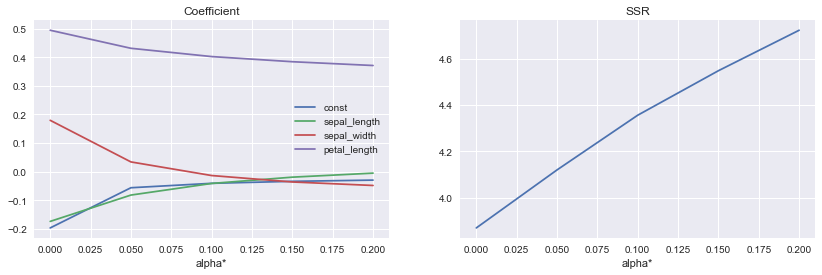

In [235]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0] = df6.iloc[:, :-1].plot(ax=ax[0])
ax[0].set_title('Coefficient')

ax[1] = df6.iloc[:, -1].plot(ax=ax[1])
ax[1].set_title('SSR')

In [ ]:
results_fr = model.fit_regularized(L1_wt=0, alpha=0.04, start_params=results_fu.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)

print final.summary()

In [197]:
plt.scatter(ZTrain[:,3],fitOLS.predict)
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.show()


ValueError: x and y must be the same size

In [178]:
#apprentissage
regLasso1.fit(ZTrain[:,:3],ZTrain[:,3])
#les coefficients
print(regLasso1.coef_)

[ 0. -0.  0.]


In [77]:
#lasso path (10 valeurs de alpha à tester)
my_alphas = numpy.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])

In [79]:
#obtention des valeurs des coefs. corresp.
from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _ = lasso_path(ZTrain[:,:3],ZTrain[:,3],alphas=my_alphas)


In [80]:
#dim. matrice des coefficients
print(coefs_lasso.shape) #(16, 10)

(3, 10)


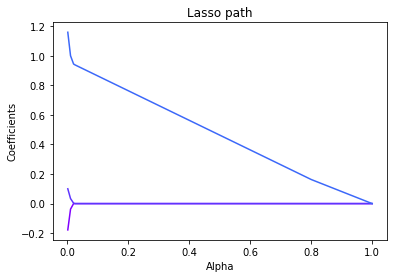

In [81]:
#jeu de couleurs pour faire joli
import matplotlib.cm as cm
couleurs = cm.rainbow(numpy.linspace(0,1,16))
#graphique lasso path (une courbe par variable)
for i in range(coefs_lasso.shape[0]):
 plt.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

In [85]:
#nombre de coefs. non-nuls pour chaque alpha
nbNonZero=numpy.apply_along_axis(func1d=numpy.count_nonzero,arr=coefs_lasso,axis=0)

#affichage mieux organisé alpha vs. nombre de coefs non-nuls
print(pd.DataFrame({'alpha':alpha_for_path,'Nb non-zero coefs':nbNonZero}))


   alpha  Nb non-zero coefs
0  1.000                  0
1  0.800                  1
2  0.500                  1
3  0.250                  1
4  0.100                  1
5  0.050                  1
6  0.025                  1
7  0.020                  2
8  0.010                  3
9  0.001                  3


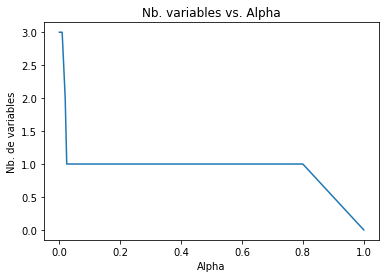

In [86]:
#ou sous forme graphique
plt.plot(alpha_for_path,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. de variables')
plt.title('Nb. variables vs. Alpha')
plt.show()


In [90]:
#nom des variables
nom_var = df.columns[:3]
#coefficients pour alpha=0.25 (colonne n°3)
coefs25 = coefs_lasso[:,3]
#affichage des coefficients pour alpha = 0.25
print(pd.DataFrame({'Variables':nom_var,'Coefficients':coefs25}))


      Variables  Coefficients
0  sepal_length      0.000000
1   sepal_width     -0.000000
2  petal_length      0.712896


In [218]:
#opti en validation croisée
#outil pour la détection de la solution la plus performante en validation croisée
#random_state = 0 pour fixer l’initialisation du générateur de nombre aléatoire
#cv = 5 pour 5-fold validation croisée
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=1)

#lancement sur l'échantillon d'apprentissage
lcv.fit(ZTrain[:,:3],ZTrain[:,3]) 

NameError: name 'LassoCV' is not defined

In [93]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [120]:
#Test avec statsmodels https://python.quantecon.org/ols.html
df['const']=1
df
#x = sepal
#y = petal

,sepal_length,sepal_width,petal_length,petal_width,species,const
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


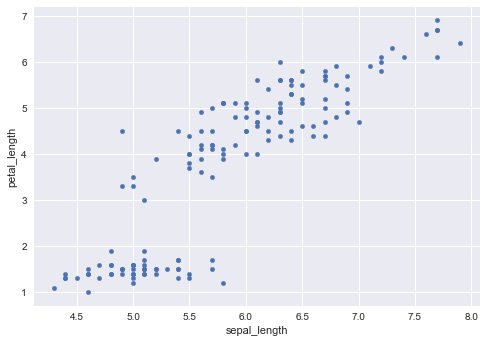

In [100]:
plt.style.use('seaborn')

df.plot(x='sepal_length', y='petal_length', kind='scatter')
plt.show()

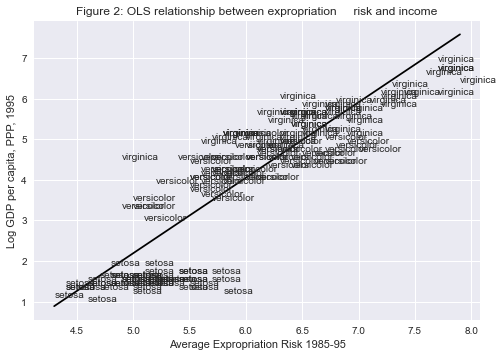

In [126]:
# Dropping NA's is required to use numpy's polyfit
df_subset = df.dropna(subset=['petal_length', 'sepal_length'])

X = df_subset['sepal_length']
y = df_subset['petal_length']
labels = df_subset['species']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')


ax.set_xlabel('Average Expropriation Risk 1985-95')
ax.set_ylabel('Log GDP per capita, PPP, 1995')
ax.set_title('Figure 2: OLS relationship between expropriation \
    risk and income')
plt.show()

In [127]:
reg1 = sm.OLS(endog=df['petal_length'], exog=df[['const', 'sepal_length']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [129]:
#obtiens estimations parameters en fit
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [130]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.04e-47
Time:                        15:38:19   Log-Likelihood:                -190.49
No. Observations:                 150   AIC:                             385.0
Df Residuals:                     148   BIC:                             391.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.0954      0.506    -14.011   

In [131]:
mean_expr = np.mean(df_subset['sepal_length'])
results.predict(exog=[1, mean_expr])

array([3.75866667])

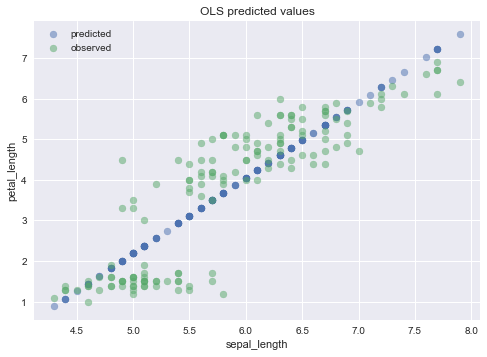

In [132]:
# Drop missing observations from whole sample

df_plot = df.dropna(subset=['petal_length', 'sepal_length'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(df_plot['sepal_length'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(df_plot['sepal_length'], df_plot['petal_length'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
plt.show()

In [133]:
df.dropna(subset=['sepal_length'])

,sepal_length,sepal_width,petal_length,petal_width,species,const
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [ ]:
#regression multiple


In [143]:
# Create lists of variables to be used in each regression
X1 = ['const', 'sepal_length']
X2 = ['const', 'sepal_length', 'petal_length']
X3 = ['const', 'sepal_length', 'petal_length', 'petal_width', 'sepal_width']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df['petal_length'], df[X1], missing='drop').fit()
reg2 = sm.OLS(df['petal_length'], df[X2], missing='drop').fit()
reg3 = sm.OLS(df['petal_length'], df[X3], missing='drop').fit()

In [151]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'sepal_length',
                                             'petal_width',
                                             'sepal_width'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)


NameError: name 'summary_col' is not defined

In [326]:
#outil pour la détection de la solution la plus performante en validation croisée
#random_state = 0 pour fixer l’initialisation du générateur de nombre aléatoire
#cv = 5 pour 5-fold validation croisée
import
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=5)

#lancement sur l'échantillon d'apprentissage
lcv.fit(ZTrain[:,:3],ZTrain[:,3]) 

NameError: name 'LassoCV' is not defined